## 简单线性回归实现

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train = np.loadtxt('data/click.csv', delimiter=',', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

theta0 = np.random.rand()
theta1 = np.random.rand()

# predict function
def f(x):
    return theta0 + theta1 * x

# Target function
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

mu = train_x.mean()
sigma = train_x.std()
def Standardize(x):
    return (x - mu) / sigma;

# train_z = Standardize(train_x)

def DoTraining(xArr, yArr):
    ETA = 1e-3
    EPSILON = 1e-2
    stdXArr = Standardize(xArr)
    error = E(stdXArr, yArr)
    diff = 1.0
    count = 0
    global theta0
    global theta1
    while diff > EPSILON :
        nTheta0 = theta0 - ETA * np.sum(f(stdXArr) - yArr)
        nTheta1 = theta1 - ETA * np.sum((f(stdXArr) - yArr) * stdXArr)
        theta0 = nTheta0
        theta1 = nTheta1
        
        cur_error = E(stdXArr, yArr)
        diff = error - cur_error
        error = cur_error

        count += 1
        #log = 'times:{} theta0:{:.3f} theta1:{:.3f} diff:{:.4f}'
        #print(log.format(count, theta0, theta1, diff))
    return stdXArr

stdXArr = DoTraining(train_x, train_y)
x = np.linspace(-3, 3, 100)
plt.plot(stdXArr, train_y, 'o')
plt.plot(x, f(x))
plt.show()


## 多项式回归

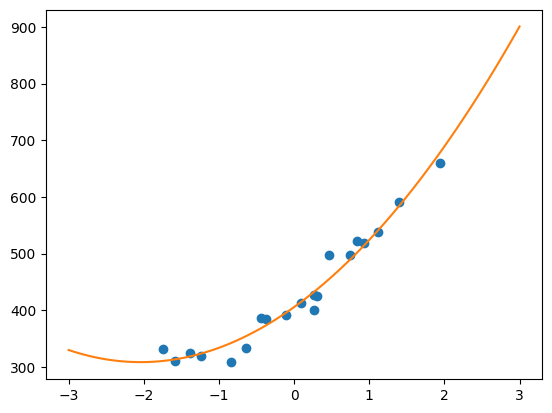

In [19]:
import numpy as np
import matplotlib.pyplot as plt

thetas_3 = np.random.rand(3)

def To_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

def Standardize(x, mu, sigma):
    return (x - mu) / sigma;    

def F(x):
    return np.dot(x, thetas_3)
    
def Error(x, y):
    return 0.5 * np.sum((y - F(x)) ** 2)

train = np.loadtxt('data/click.csv', delimiter=',', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]
mu = train_x.mean()
sigma = train_x.std()

train_z = Standardize(train_x, mu, sigma)
X = To_matrix(train_z)
def training():
    diff = 1.0
    EPSILON = 0.01
    ETA = 1e-3
    error = Error(X, train_y)
    global thetas_3
    while diff > EPSILON :
        thetas_3 = thetas_3 - ETA * np.dot(F(X) - train_y, X)
        current_error = Error(X, train_y)
        diff = error - current_error
        error = current_error

training()
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(To_matrix(x)))
plt.show()

## 分类

## 逻辑回归

## 引用
1. https://research.facebook.com/publications/avatars-grow-legs-generating-smooth-human-motion-from-sparse-tracking-inputs-with-diffusion-model/
2. https://github.com/fengdu78/deeplearning_ai_books